## Import packages

In [1]:
%matplotlib inline
import pandas as pd
from pandas.plotting import lag_plot
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [16, 6]

### Helper function to get and process the data

In [3]:
def dataget(train_path, test_path):

    train_data = pd.read_csv(train_path)
    test_data = pd.read_csv(test_path)
    #Join the train and test data to cleanse and enhance the data
    df = train_data.append(test_data, ignore_index=True)
    Titles_Dictionary = {
                        "Capt":         "Officer",
                        "Col":          "Officer",
                        "Major":        "Officer",
                        "Jonkheer":     "Royalty",
                        "Don":          "Royalty",
                        "Sir":          "Royalty",
                        "Dr":           "Officer",
                        "Rev":          "Officer",
                        "the Countess": "Royalty",
                        "Dona":         "Royalty",
                        "Mme":          "Mrs",
                        "Mlle":         "Miss",
                        "Ms":           "Mrs",
                        "Mr":           "Mr",
                        "Mrs":          "Mrs",
                        "Miss":         "Miss",
                        "Master":       "Master",
                        "Lady":         "Royalty"
                        }
    ## Extract Title and map to the Titles from each Name
    df['Title'] = df['Name'].apply(lambda x: Titles_Dictionary[x.split(',')[1].split('.')[0].strip()])
    ## Fill missing Embarked with 'C'
    df['Embarked'].fillna('C', inplace=True)
    ## Note down the Imputed Ages
    df['Imputed'] = df['Age'].isnull().astype('uint8')
    columns = ['Age','Fare']
    groups = ['Title', 'Embarked']
    ## Fill null Ages with the mean Age based on Title, Embarked
    df[columns] = df.groupby(groups)[columns].transform(lambda x: x.fillna(x.mean()))
    ## Convert to categorical data
    categories = ['Title', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
    df[categories] = df[categories].apply(lambda x: x.astype('category'))
    df = df.drop(columns=['Cabin', 'Name', 'Ticket'])
    #df = df.drop(columns=['Title', 'SibSp', 'Imputed', 'Pclass', 'Parch', 'Embarked', 'Fare'])
    df = df.round(2)
    original = df.copy()
    df = pd.get_dummies(df, drop_first=True)
    test_data = df[df.Survived.isnull()].copy()
    test_data = test_data.drop(columns=['Survived'])
    train_data = df.dropna().copy()
    train_data['Survived'] = train_data['Survived'].astype('uint8')
    train_data = train_data.drop(columns=['PassengerId'])

    return original, train_data, test_data

In [4]:
train_path = 'train.csv'
test_path = 'test.csv'
original, train_data, test_data = dataget(train_path, test_path)
df = original.copy()
df.drop(columns=['PassengerId'], inplace=True)
#df.dropna(inplace=True)
columns = df.columns
print(df.head(10))

     Age Embarked   Fare Parch Pclass     Sex SibSp  Survived   Title  Imputed
0  22.00        S   7.25     0      3    male     1       0.0      Mr        0
1  38.00        C  71.28     0      1  female     1       1.0     Mrs        0
2  26.00        S   7.92     0      3  female     0       1.0    Miss        0
3  35.00        S  53.10     0      1  female     1       1.0     Mrs        0
4  35.00        S   8.05     0      3    male     0       0.0      Mr        0
5  36.24        Q   8.46     0      3    male     0       0.0      Mr        1
6  54.00        S  51.86     0      1    male     0       0.0      Mr        0
7   2.00        S  21.08     1      3    male     3       0.0  Master        0
8  27.00        S  11.13     2      3  female     0       1.0     Mrs        0
9  14.00        C  30.07     0      2  female     1       1.0     Mrs        0


In [5]:
print(df.describe())

               Age         Fare    Survived      Imputed
count  1309.000000  1309.000000  891.000000  1309.000000
mean     30.085829    33.285921    0.383838     0.200917
std      13.214767    51.740153    0.486592     0.400839
min       0.170000     0.000000    0.000000     0.000000
25%      22.000000     7.900000    0.000000     0.000000
50%      30.000000    14.450000    0.000000     0.000000
75%      36.240000    31.280000    1.000000     0.000000
max      80.000000   512.330000    1.000000     1.000000


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
Age         1309 non-null float64
Embarked    1309 non-null category
Fare        1309 non-null float64
Parch       1309 non-null category
Pclass      1309 non-null category
Sex         1309 non-null category
SibSp       1309 non-null category
Survived    891 non-null float64
Title       1309 non-null category
Imputed     1309 non-null uint8
dtypes: category(6), float64(3), uint8(1)
memory usage: 40.9 KB
None


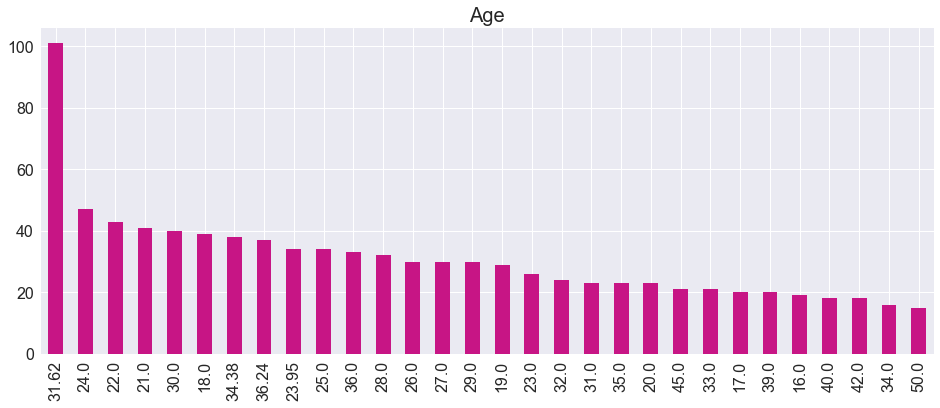

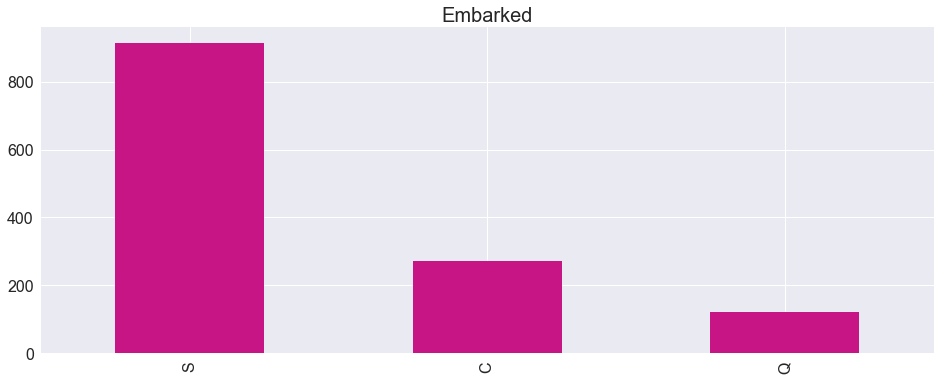

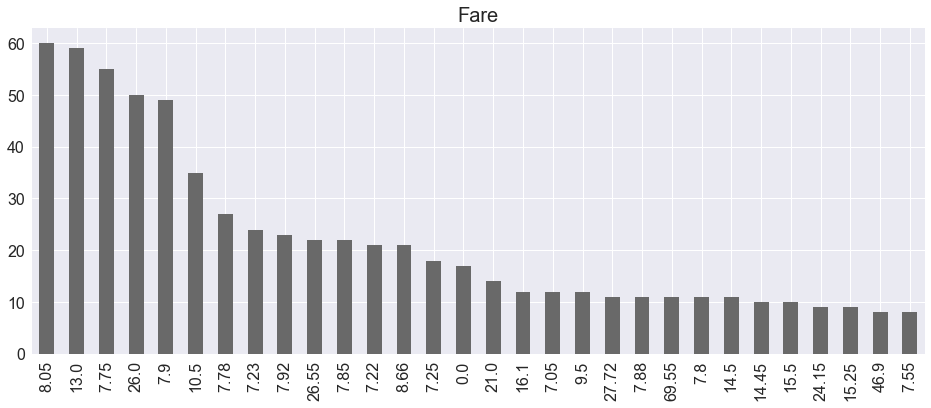

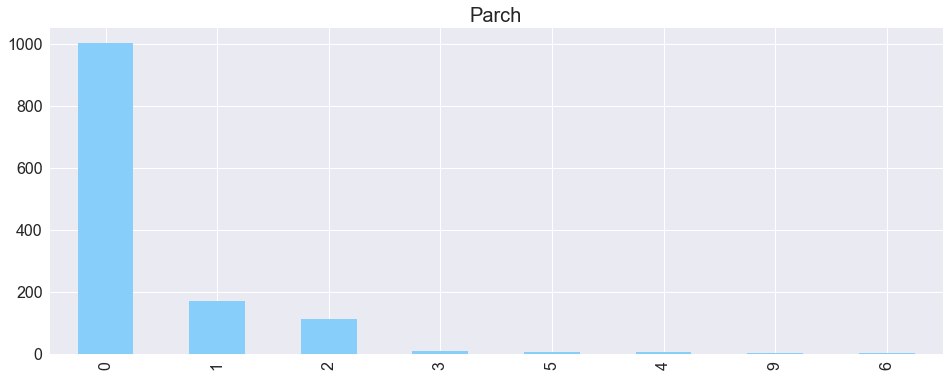

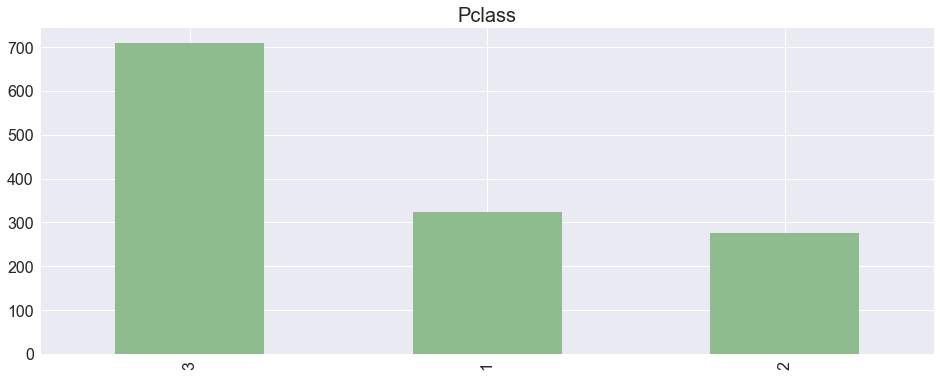

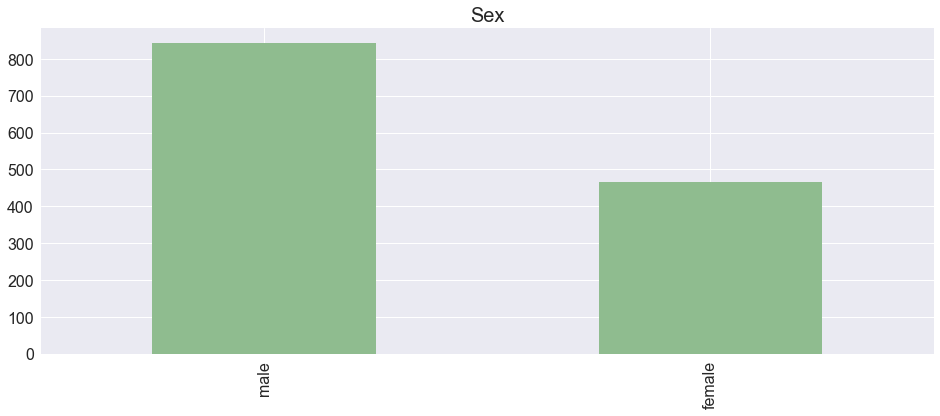

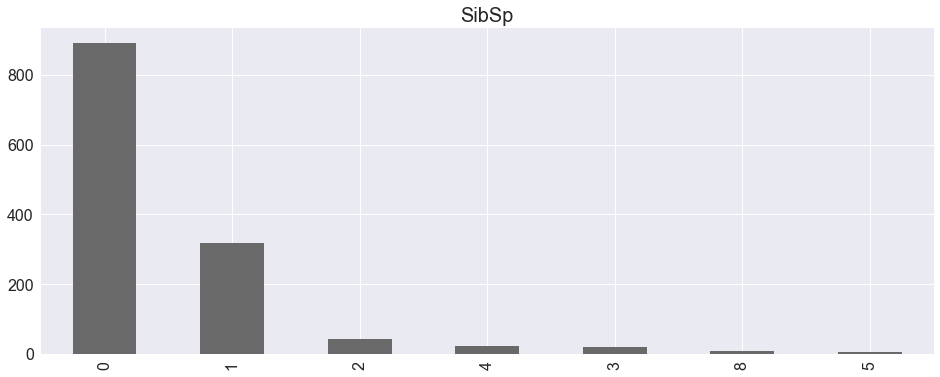

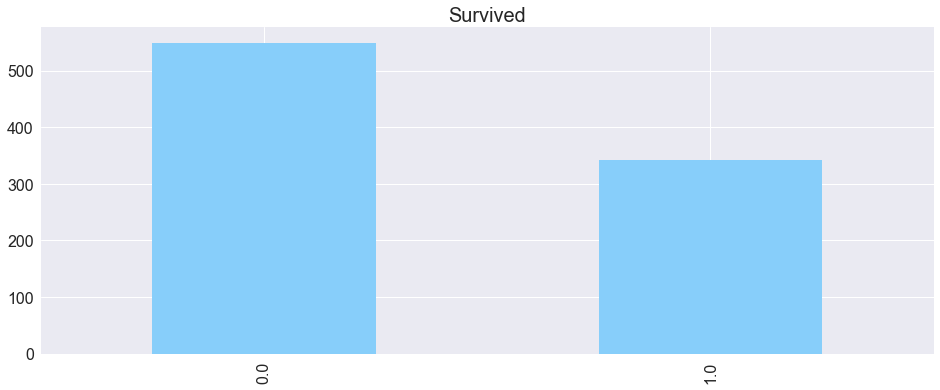

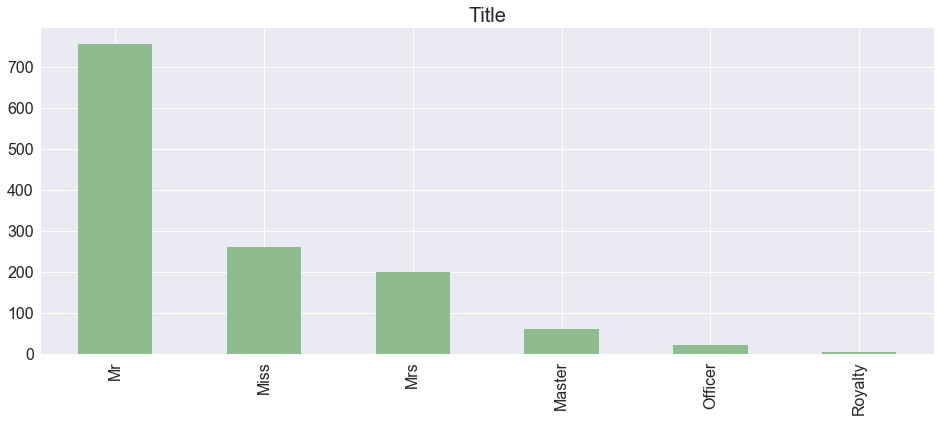

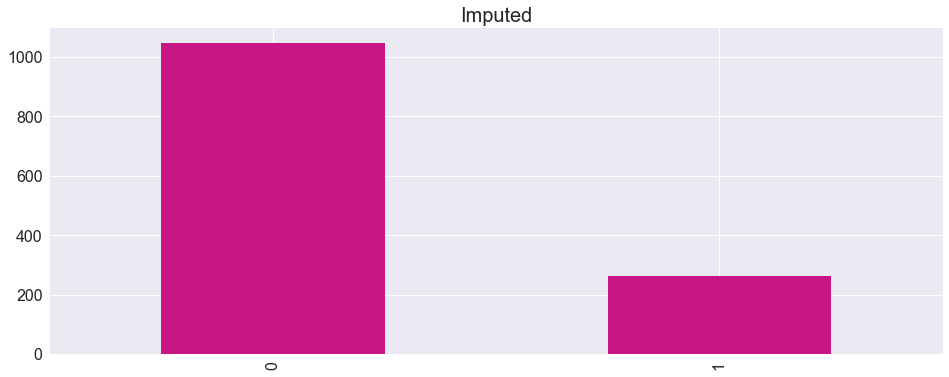

In [7]:
sns.set(style='darkgrid')
for column in columns:
    colors = ['dimgray', 'darkseagreen', 'mediumvioletred', 'yellowgreen', 'lightskyblue']
    color = random.choice(colors)
    ax = df[column].value_counts().head(30).plot.bar(
        color=color,
        fontsize=16,
    )
    ax.set_title(column, fontsize=20)
    sns.despine(bottom=True, left=True)
    plt.show()

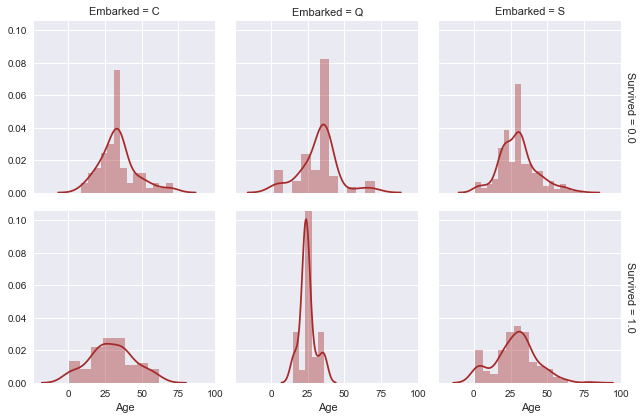

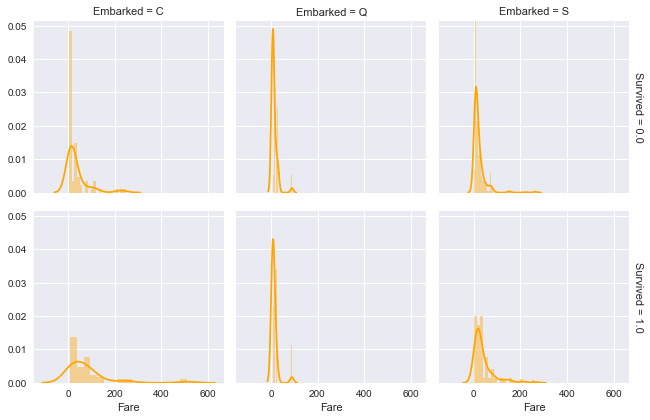

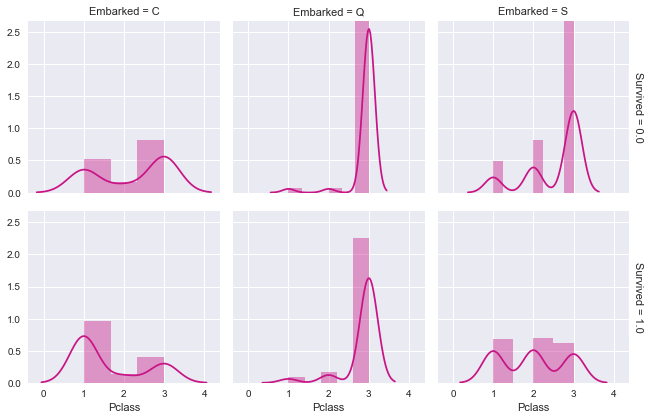

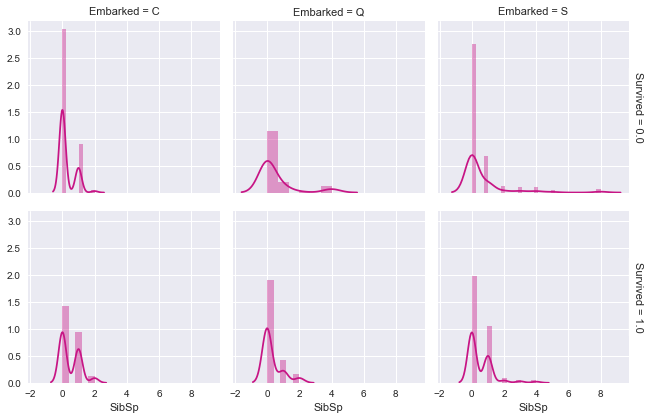

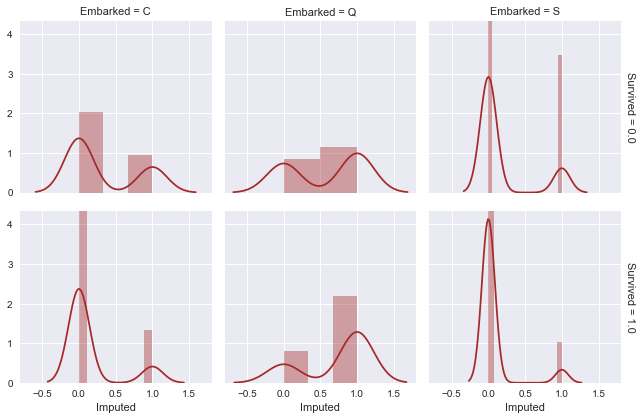

In [8]:
for column in columns:
    colors = ['brown', 'mediumvioletred', 'orange']
    color = random.choice(colors)
    if column not in ['Survived', 'Embarked','Sex','Title','Parch']:
        ax = sns.FacetGrid(df, row="Survived", col='Embarked', margin_titles=True)
        ax.map(sns.distplot, column, color=color)
        sns.despine(bottom=True, left=True)
        plt.show()

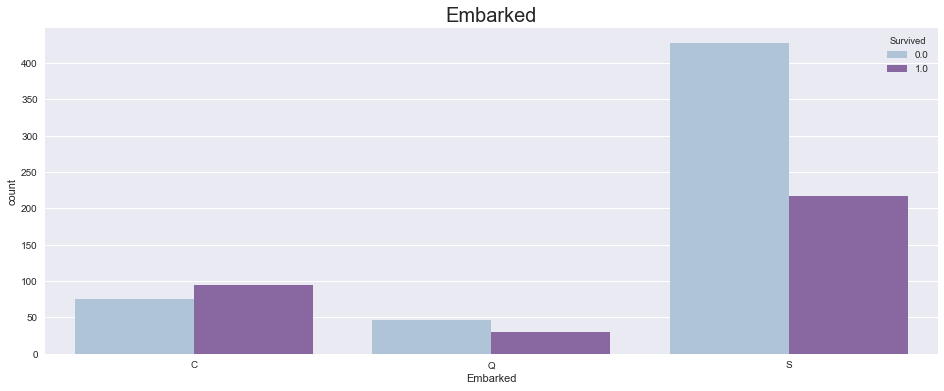

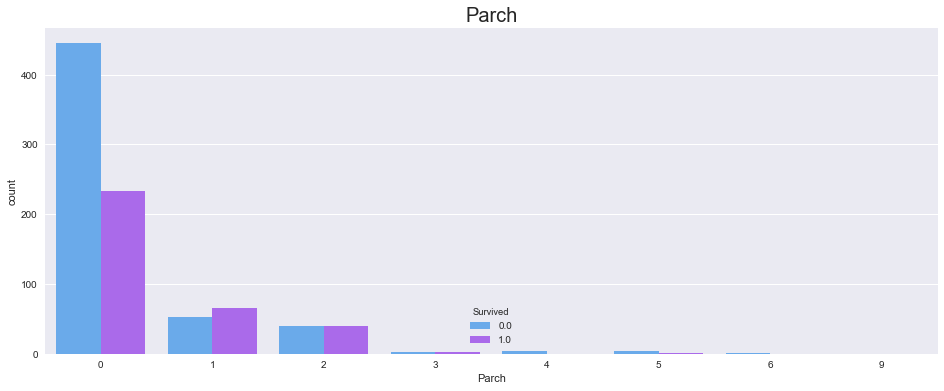

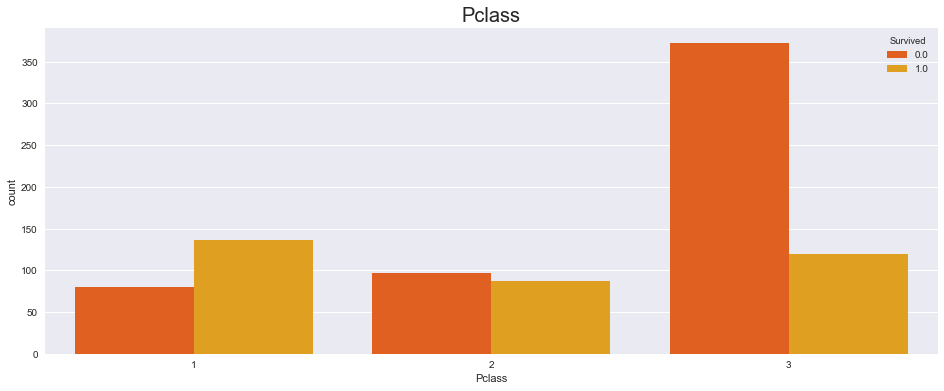

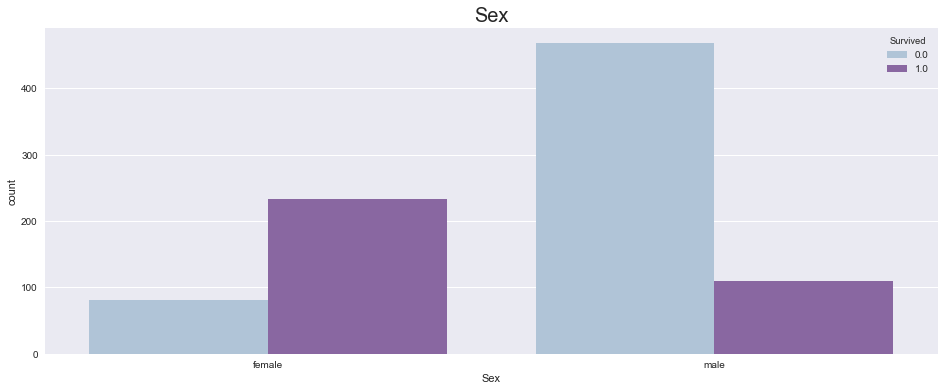

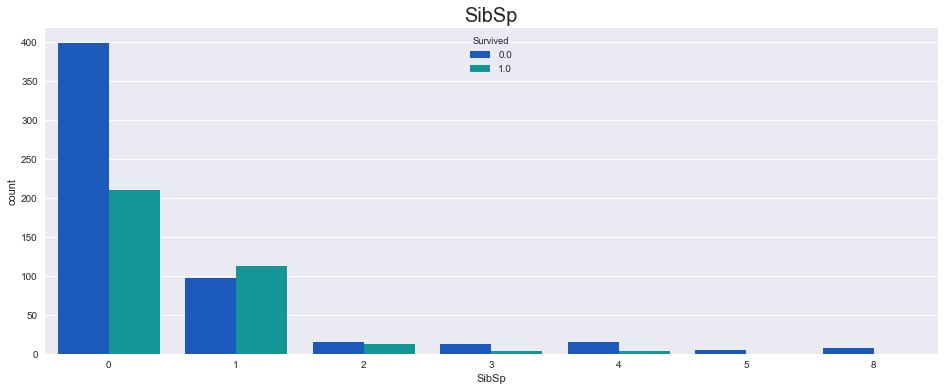

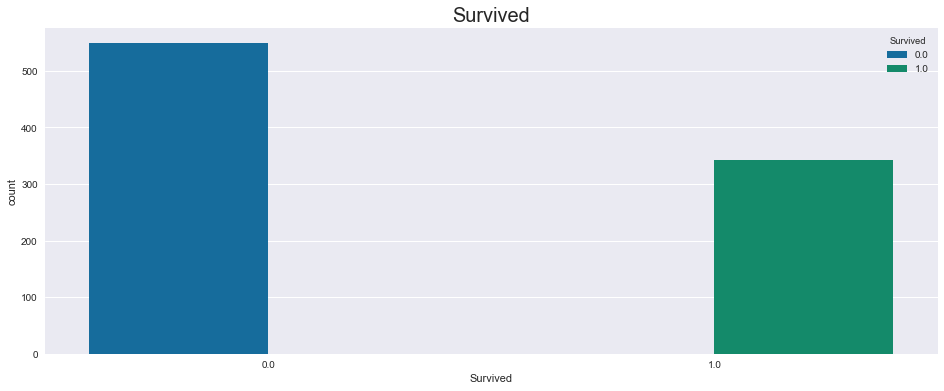

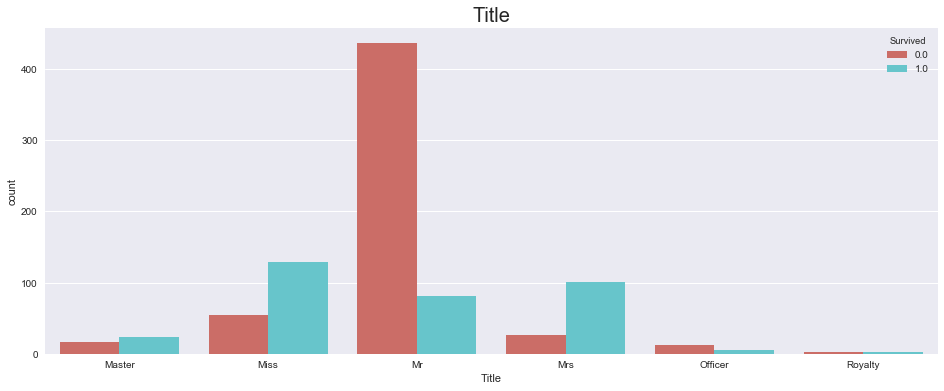

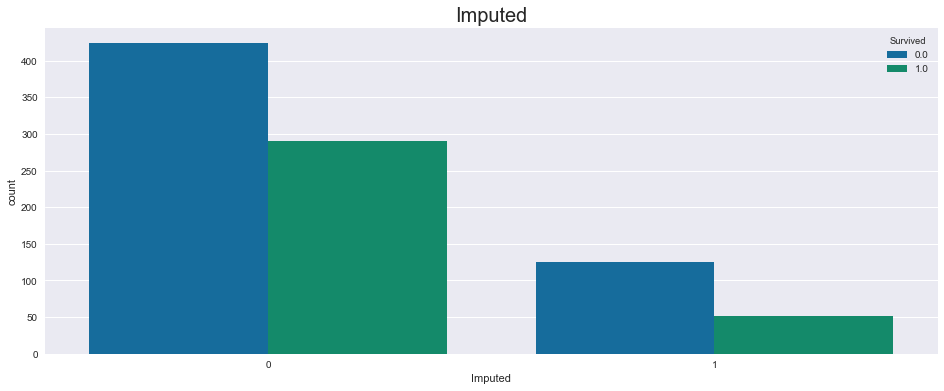

In [9]:
for column in columns:
    palettes = ['cool', 'summer', 'autumn', 'winter', 'copper', 'BuPu', 'Paired', 'pastel', 'muted', 'colorblind', 'hls']
    #palettes = ['hls', 'husl', 'Set2']
    palette = random.choice(palettes)
    if column not in ['Age', 'Fare']:
        ax = sns.countplot(column, hue='Survived',data=df, palette=palette)
        ax.set_title(column, fontsize=20)
        sns.despine(bottom=True, left=True)
        plt.show()

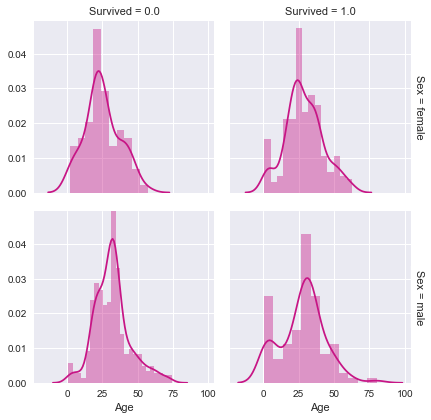

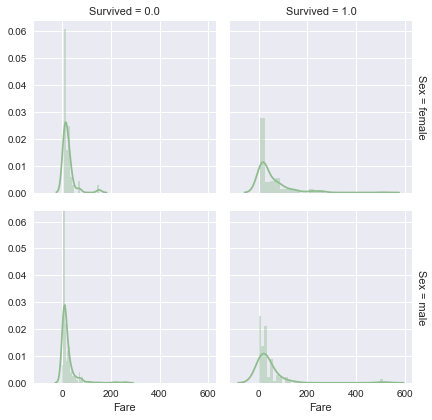

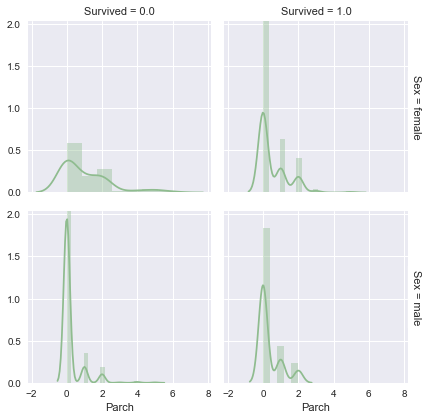

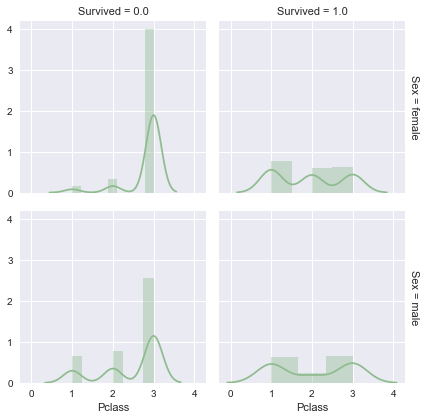

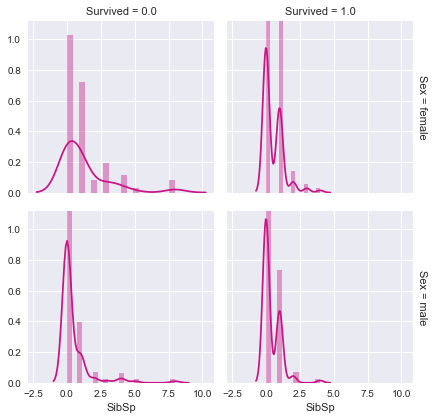

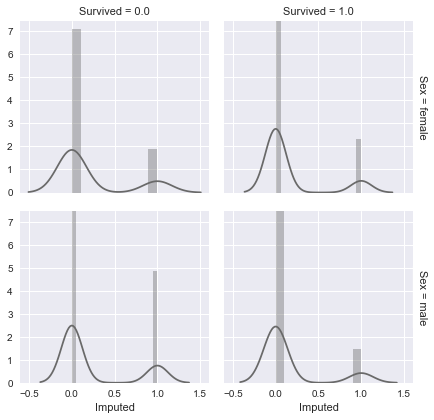

In [10]:
columns = df.columns
for column in columns:
    colors = ['dimgray', 'darkseagreen', 'mediumvioletred']
    color = random.choice(colors)
    if column not in ['Sex', 'Survived', 'Embarked', 'Title']:
        ax = sns.FacetGrid(df, row="Sex", col="Survived", margin_titles=True)
        ax.map(sns.distplot, column, color=color)
        sns.despine(bottom=True, left=True)
        plt.show()

In [11]:
sns.reset_defaults()
plt.rcParams['figure.figsize'] = [16, 6]

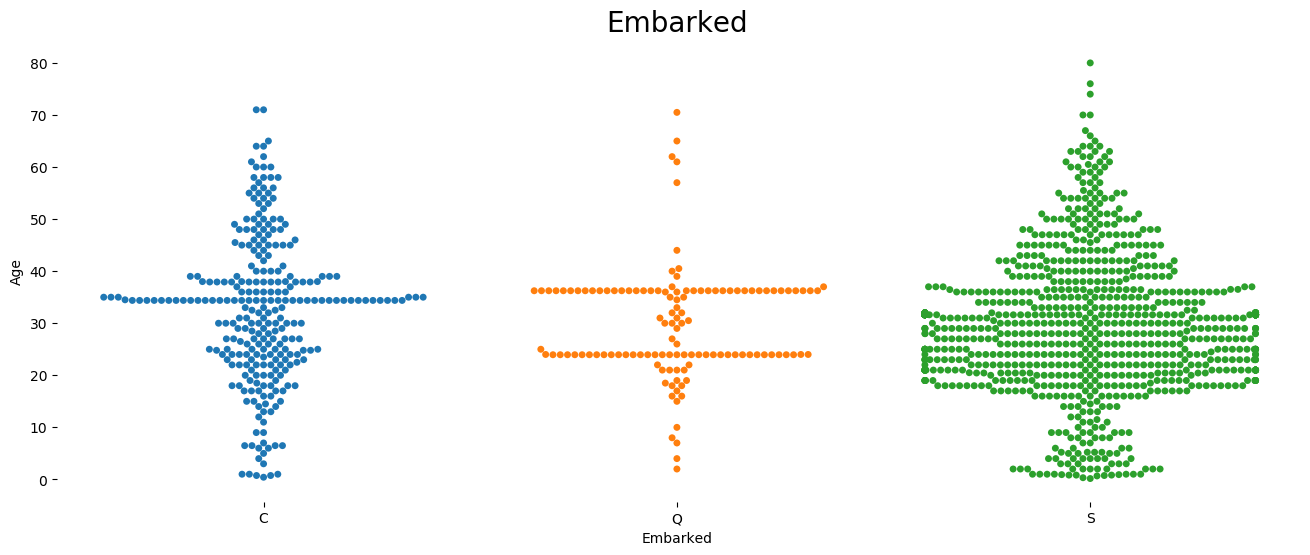

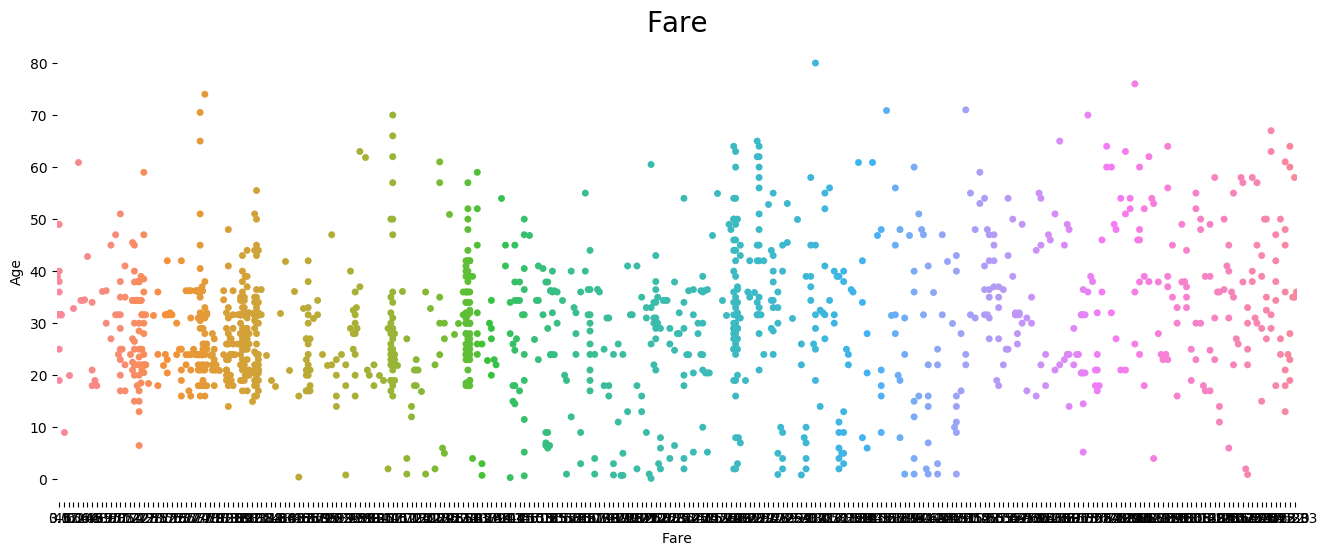

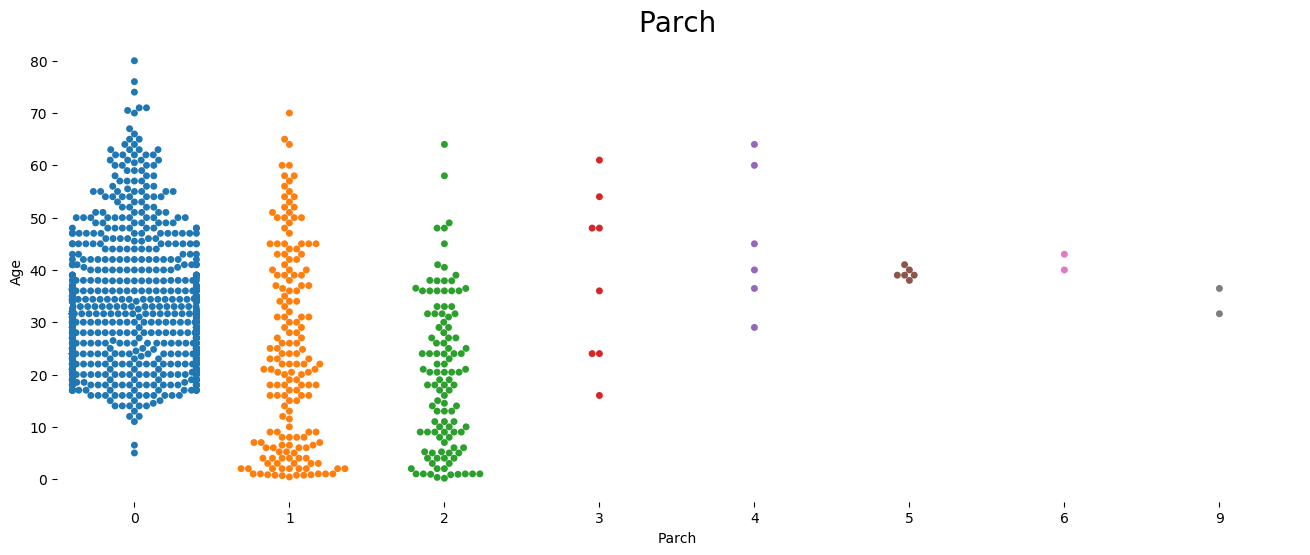

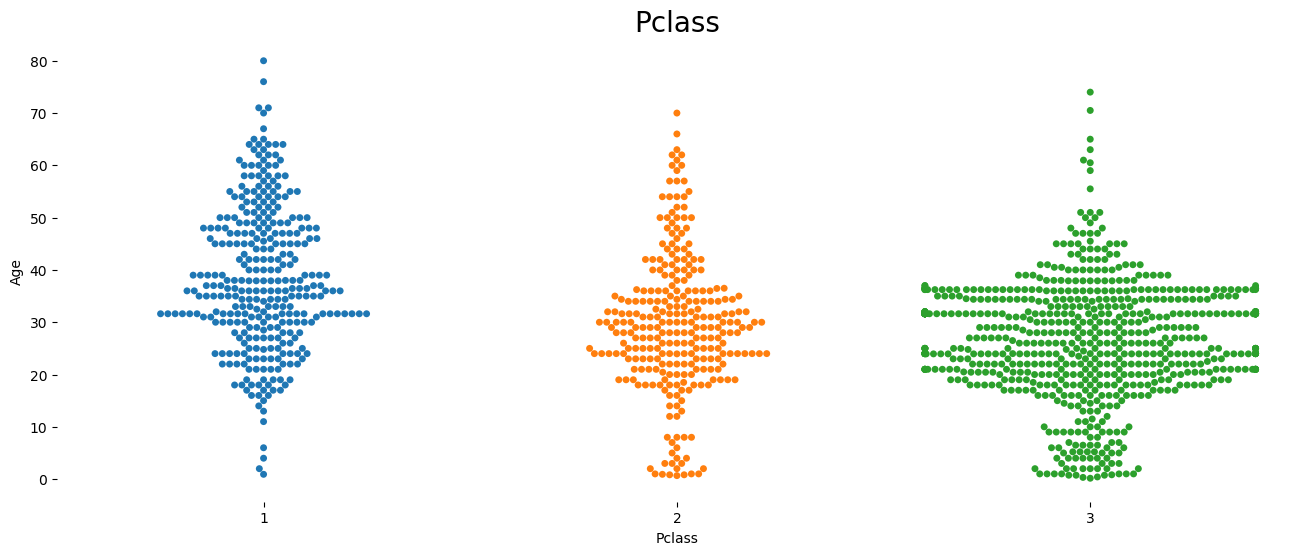

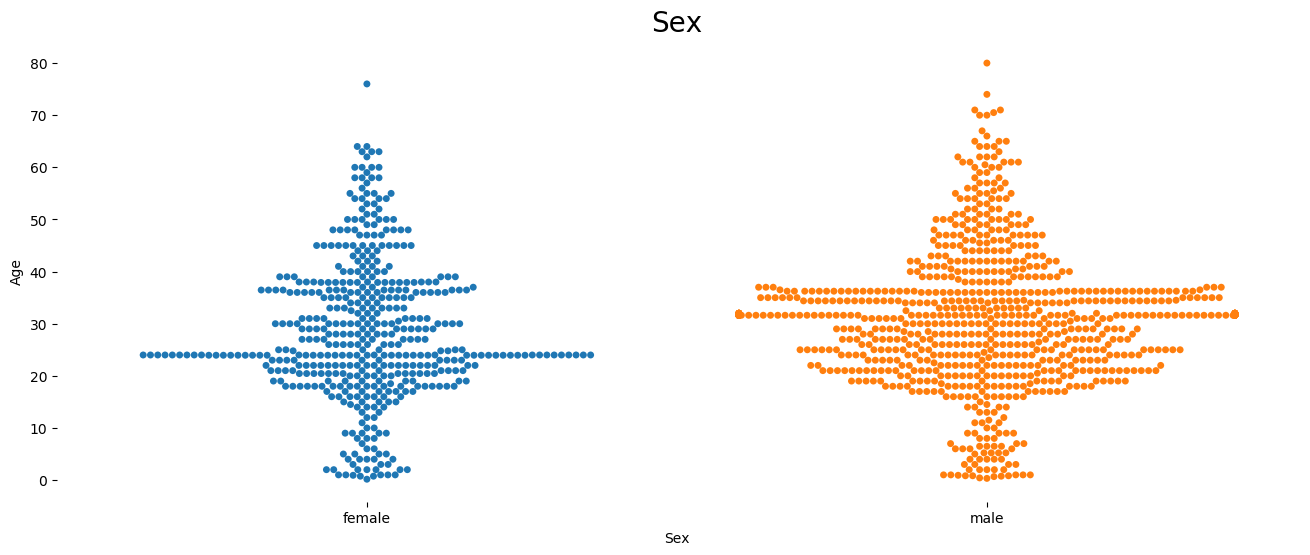

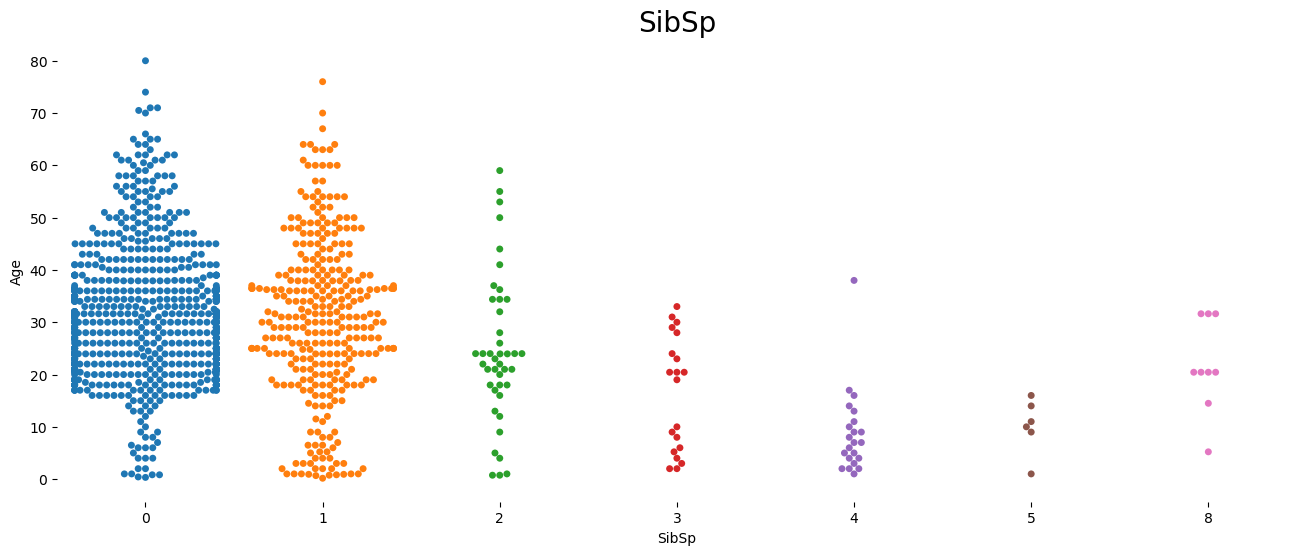

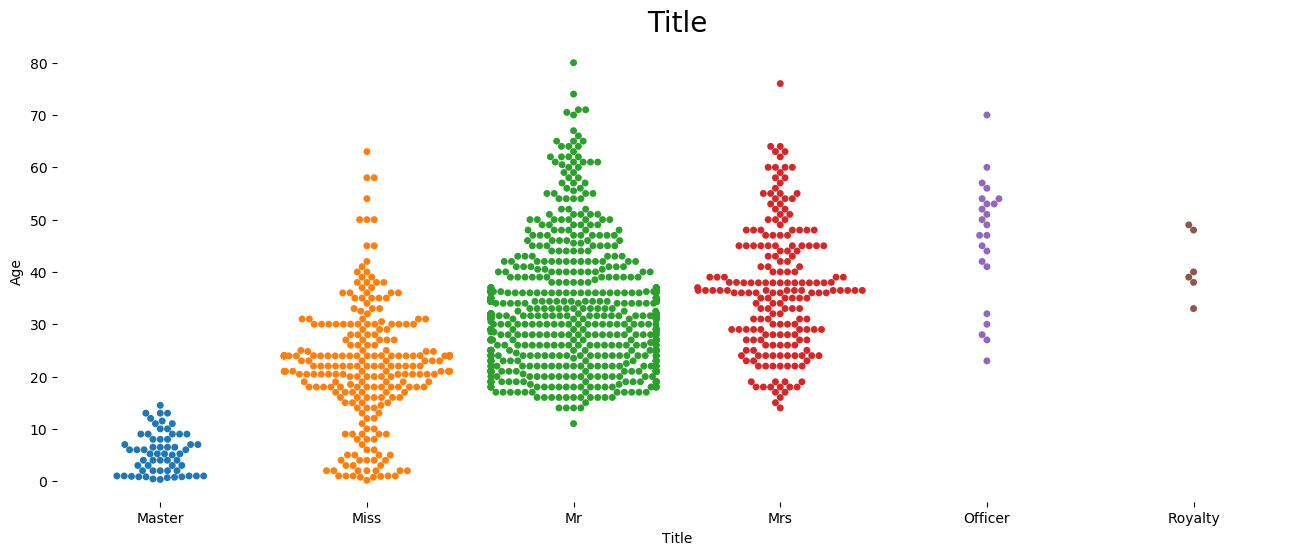

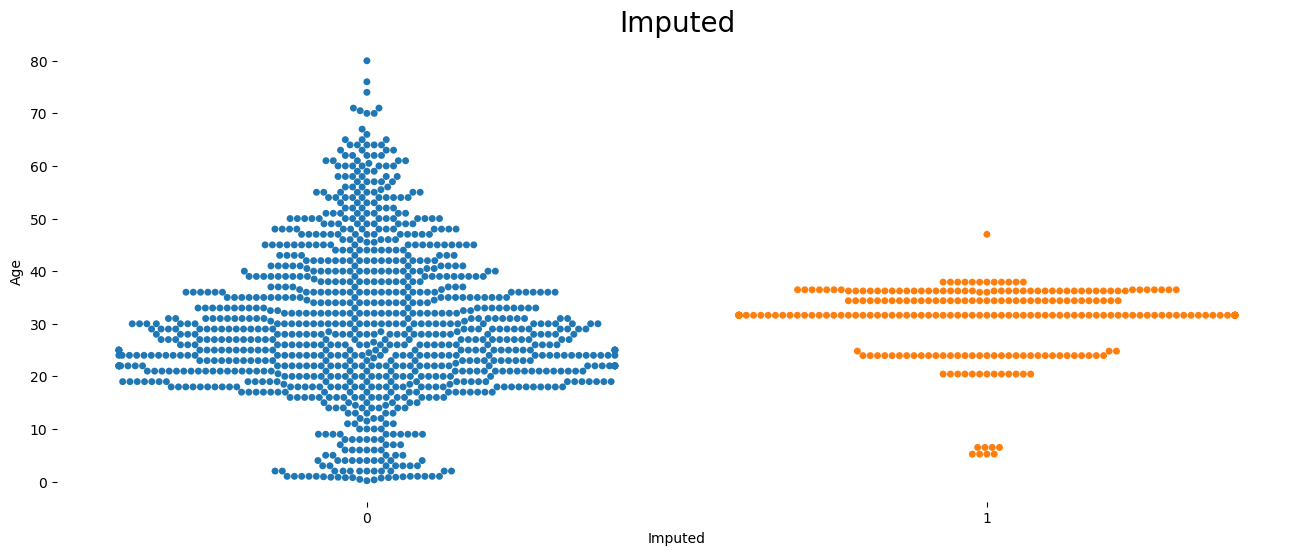

In [12]:
for column in columns:
    palettes = ['cool', 'summer', 'autumn', 'winter', 'BuPu', 'Paired', 'pastel', 'muted', 'colorblind', 'hls']
    #palettes = ['hls', 'husl', 'Set2']
    palette = random.choice(palettes)
    if column not in ['Age', 'Survived']:
        ax = sns.swarmplot(x=column, y="Age", data=df)# hue='Survived', palette=palette)
        ax.set_title(column, fontsize=20)
        sns.despine(bottom=True, left=True)
        plt.show()

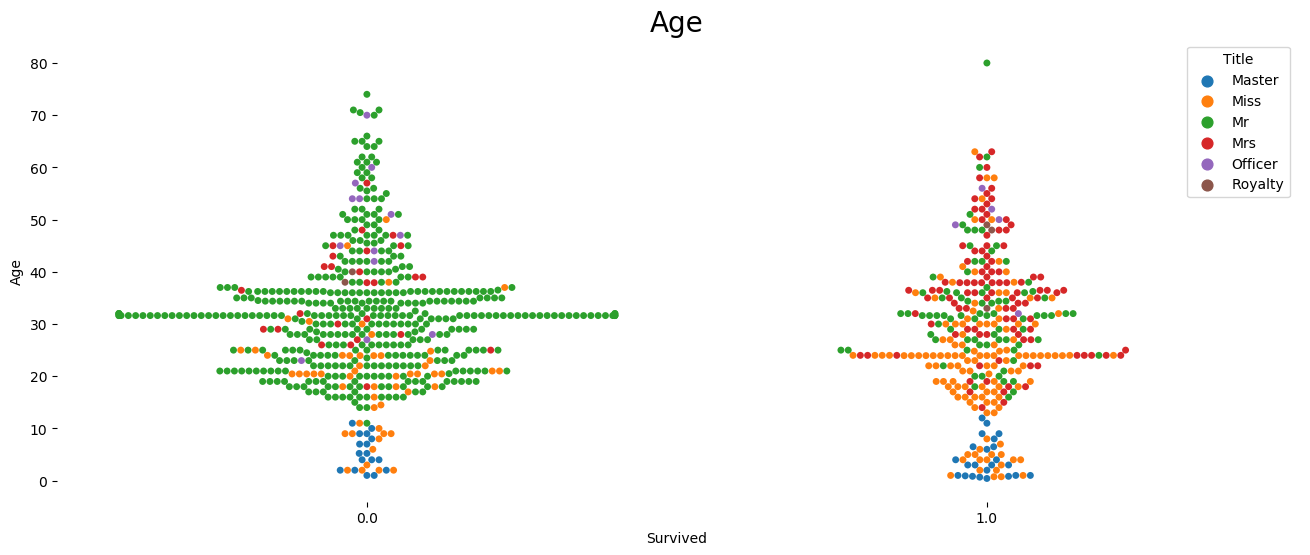

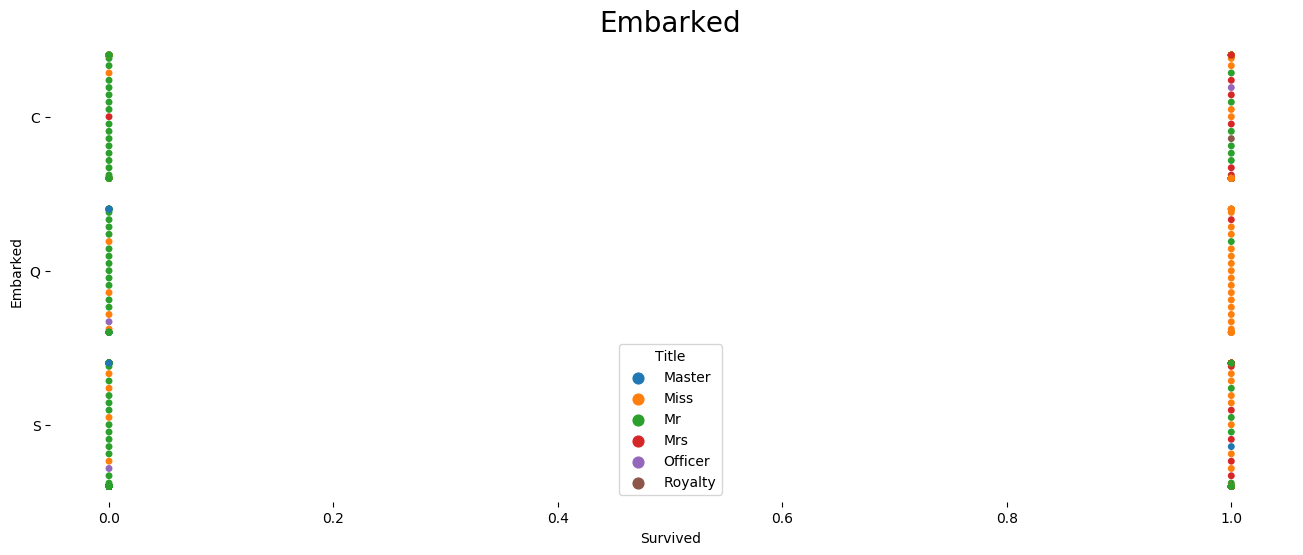

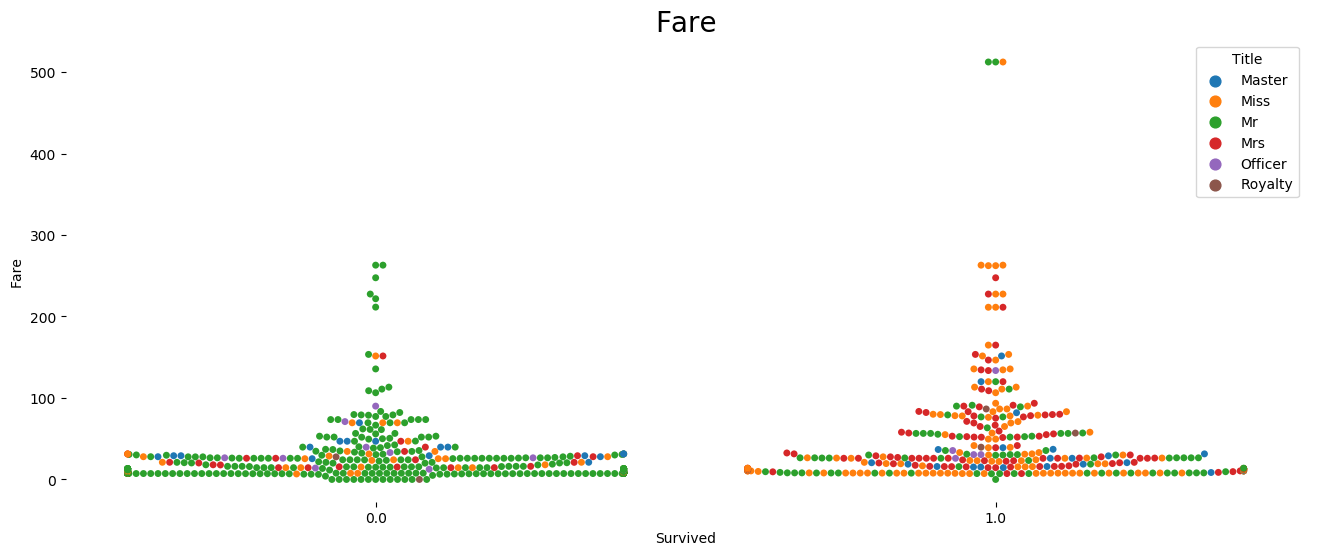

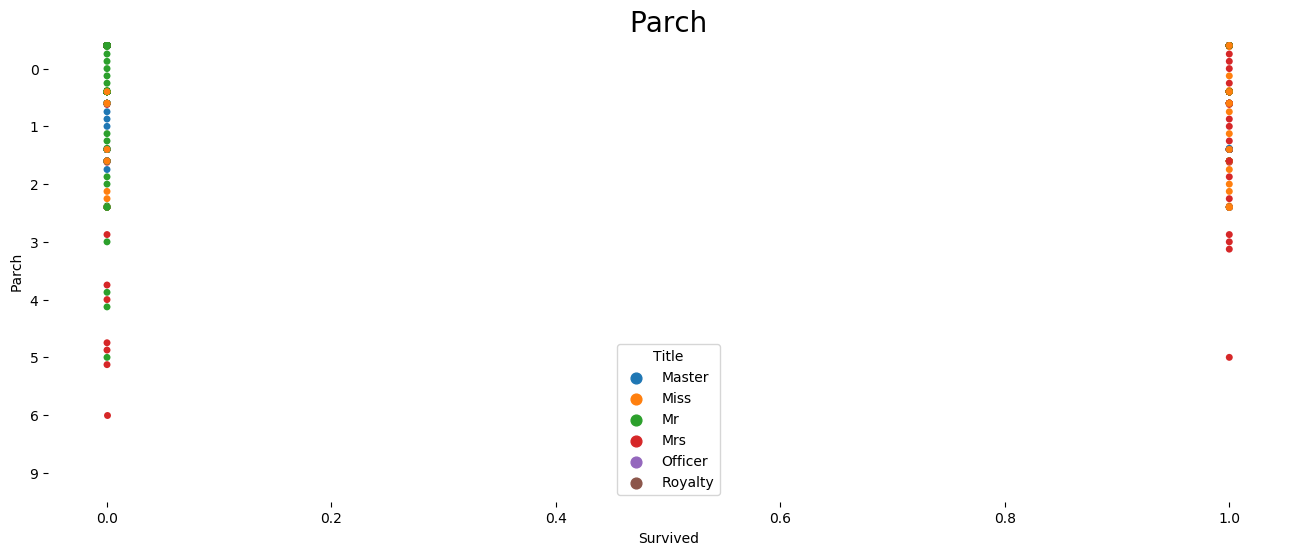

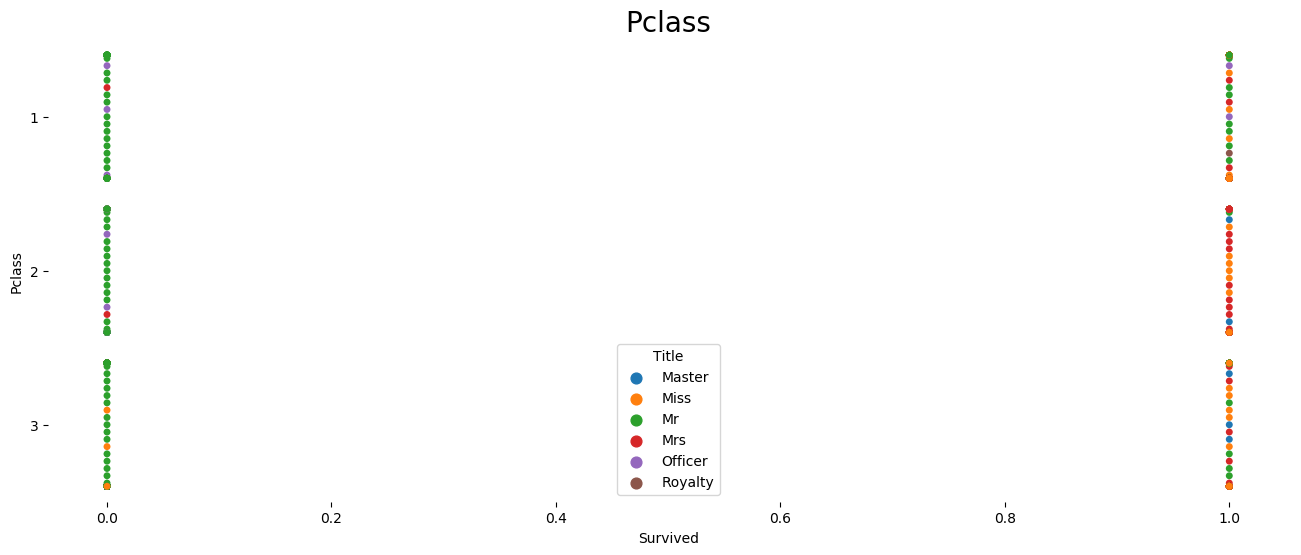

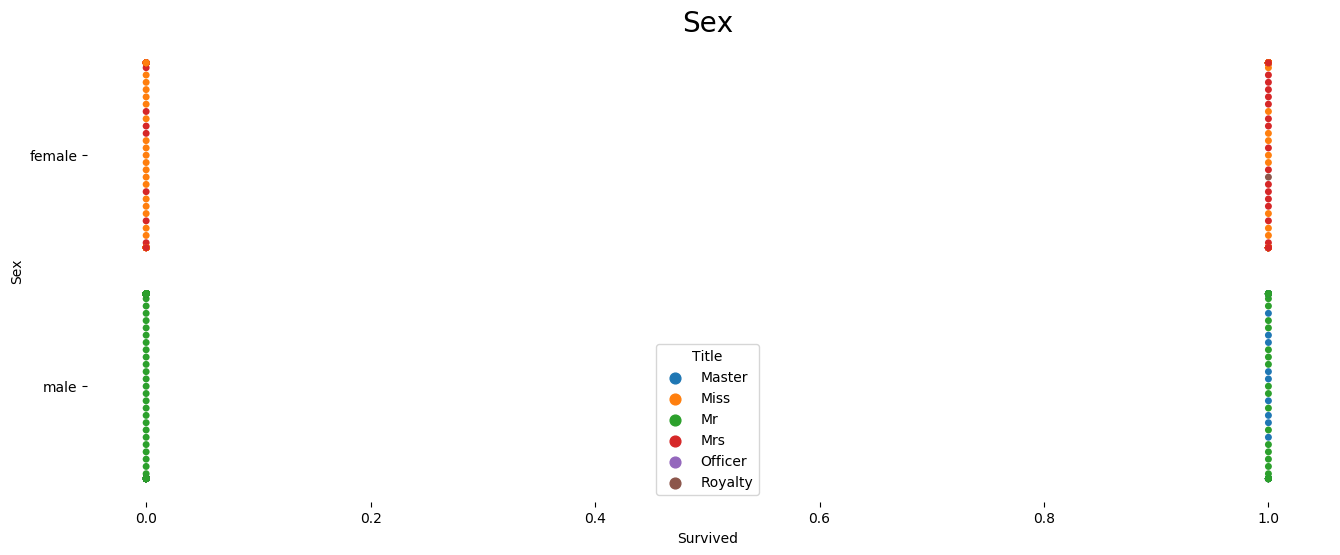

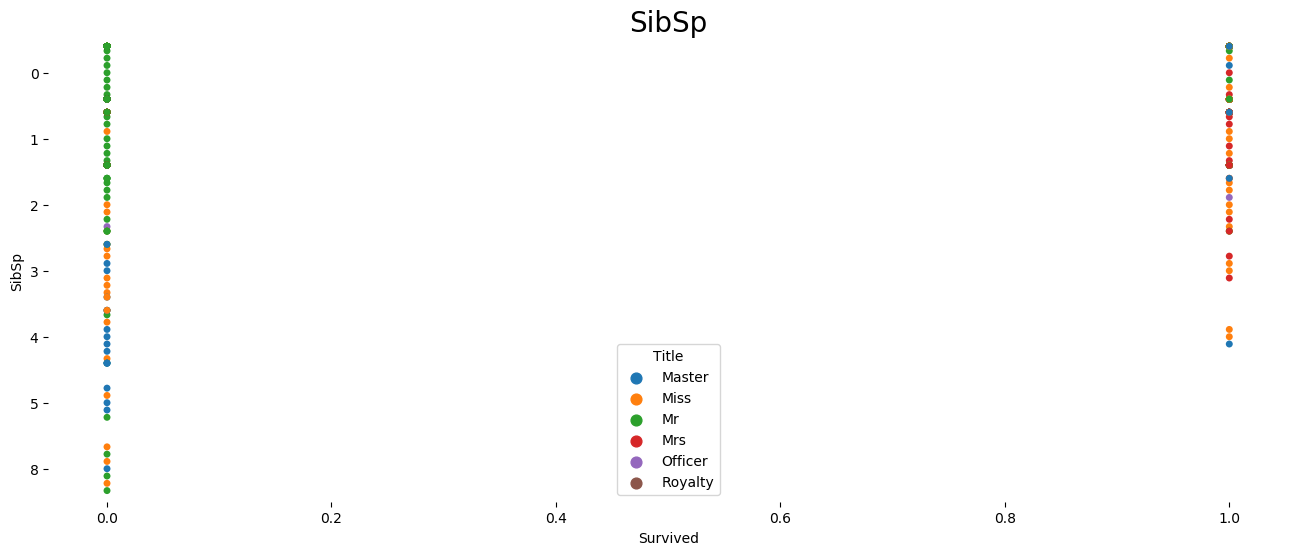

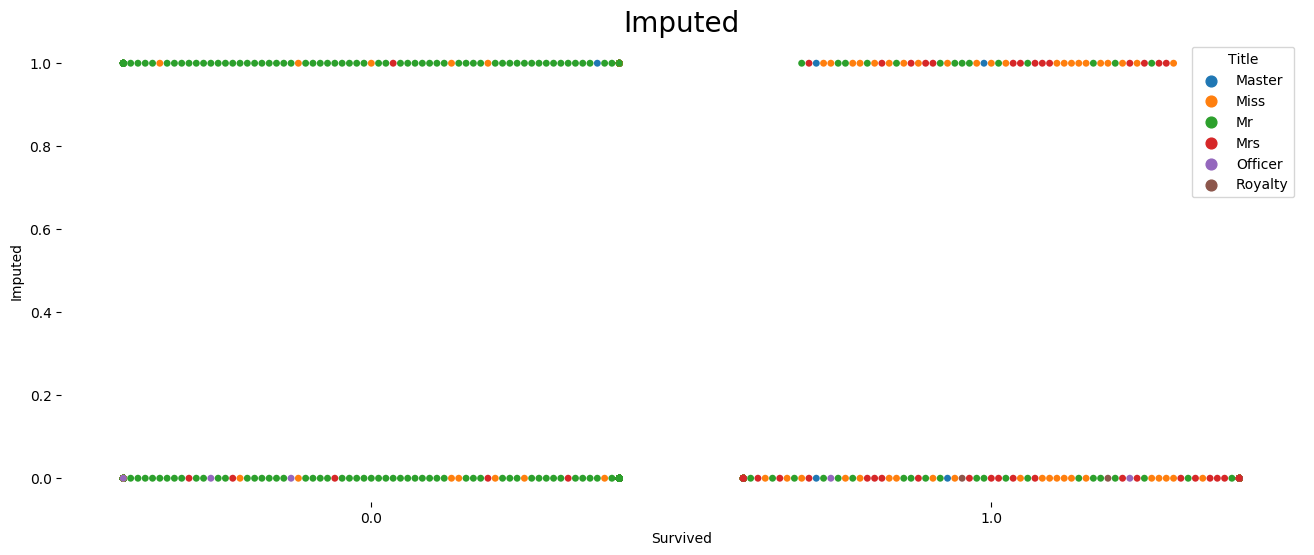

In [13]:
for column in columns:
    palettes = ['summer', 'muted', 'colorblind', 'Set1']
    #palettes = ['Dark2', 'cubehelix']
    palette = random.choice(palettes)
    if column not in ['Survived', 'Title']:
        ax = sns.swarmplot(data=df, x='Survived', y=column, hue='Title')
        ax.set_title(column, fontsize=20)
        sns.despine(bottom=True, left=True)
        plt.show()

In [14]:
df.info()
sns.reset_defaults()
plt.rcParams['figure.figsize'] = [16, 6]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
Age         1309 non-null float64
Embarked    1309 non-null category
Fare        1309 non-null float64
Parch       1309 non-null category
Pclass      1309 non-null category
Sex         1309 non-null category
SibSp       1309 non-null category
Survived    891 non-null float64
Title       1309 non-null category
Imputed     1309 non-null uint8
dtypes: category(6), float64(3), uint8(1)
memory usage: 40.9 KB


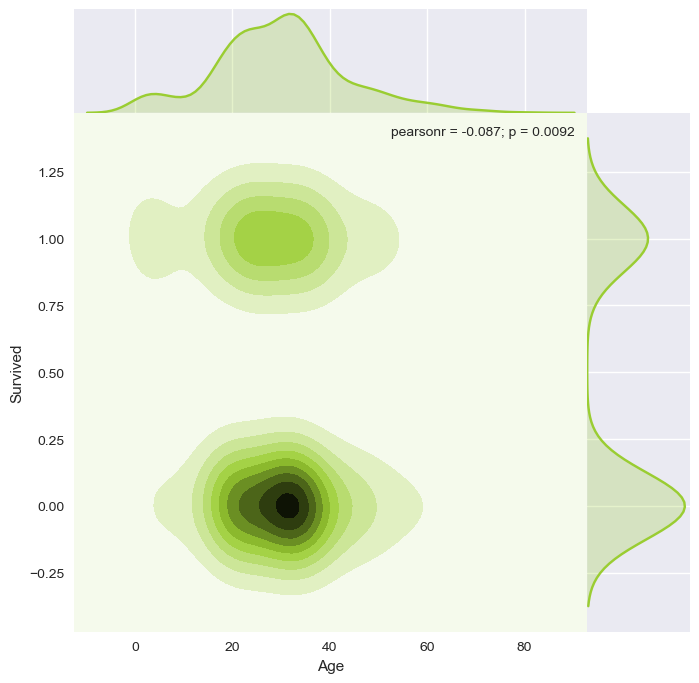

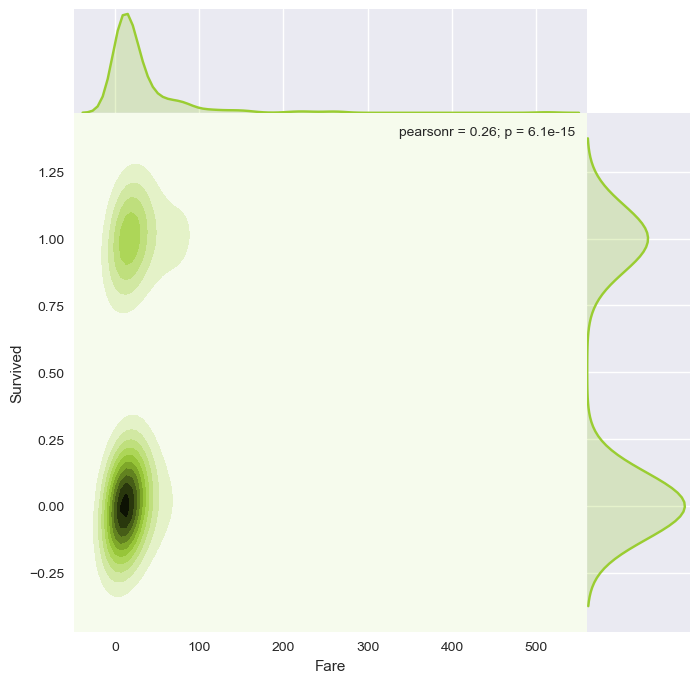

In [15]:
sns.set(style='darkgrid')
for column in columns:
    colors = ['dimgray', 'darkseagreen', 'mediumvioletred', 'yellowgreen', 'lightskyblue']
    color = random.choice(colors)
    if column not in ['Survived', 'Embarked', 'Parch','Pclass', 'Sex', 'SibSp', 'Survived', 'Title', 'Imputed']:
        ax = sns.jointplot(df[column], df['Survived'], kind="kde", size=7, space=0, color=color)
        sns.despine(bottom=True, left=True)
        plt.show()

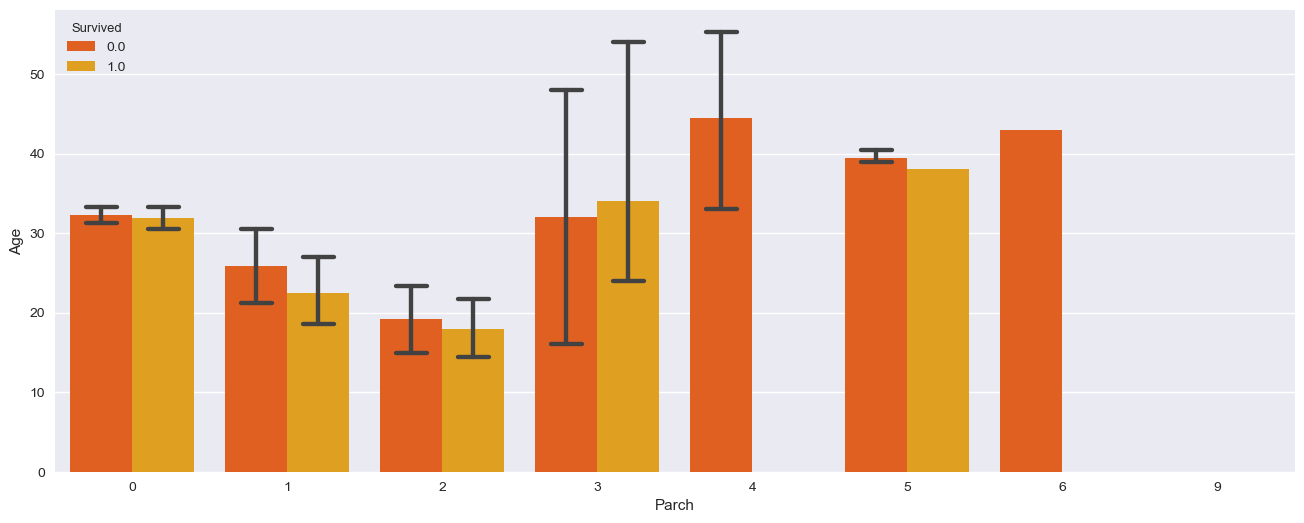

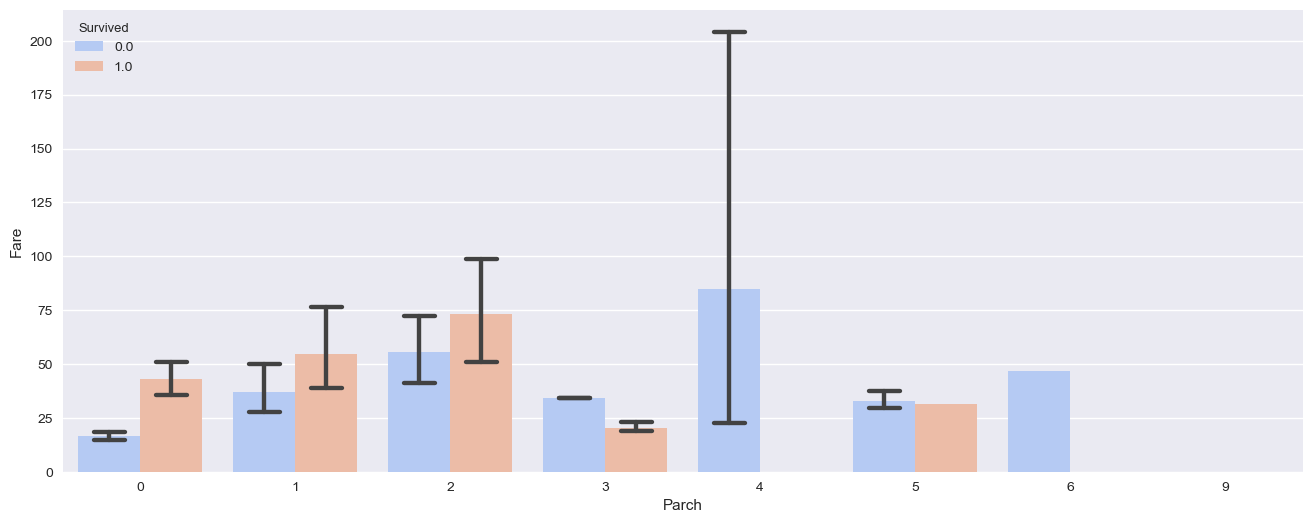

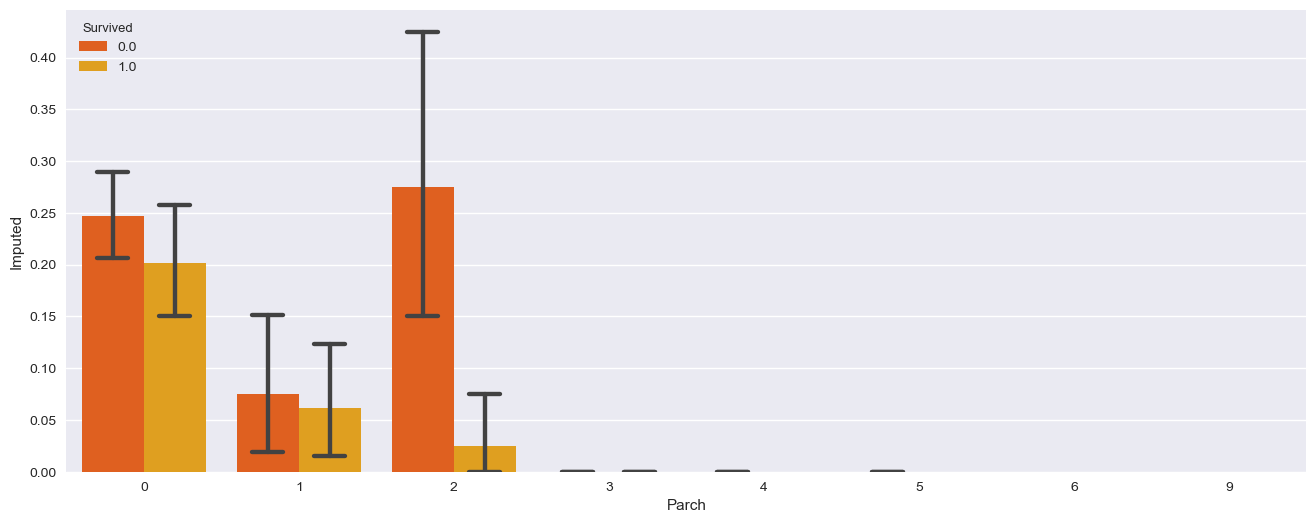

In [16]:
columns = df.select_dtypes(exclude=['category']).columns
for column in columns:
    colors = ['coolwarm', 'cool', 'summer', 'autumn', 'winter']
    color = random.choice(colors)
    if column not in ['Parch', 'Survived']:
        ax = sns.barplot(x='Parch', y=column, hue='Survived', data=df, palette=color,capsize=0.2)
        sns.despine(bottom=True, left=True)
        plt.show()

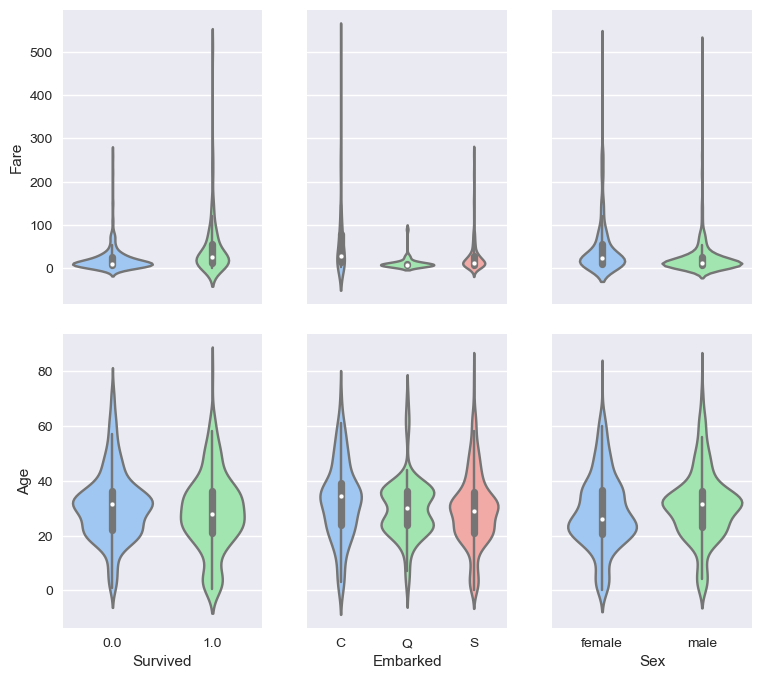

In [17]:
ax = sns.PairGrid(df,
                 x_vars=["Survived", "Embarked", "Sex"],
                 y_vars=["Fare", "Age"],
                 aspect=.75, size=3.5)
ax.map(sns.violinplot, palette="pastel");